<h1 style="text-align: center; font-family: Arial"> TP 1 - Séance 1 </h1>
<h2 style="text-align: center; font-family: Arial"> Qualité d'image </h2>

In [33]:
# Importe les modules qui seront utilisé dans le laboratoire.
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 7)

# Exercice I (4 points): Étude de la Résolution
## Mesure de la résolution spatiale

**1.** Ouvrir et afficher l'image ```resolution.png```.

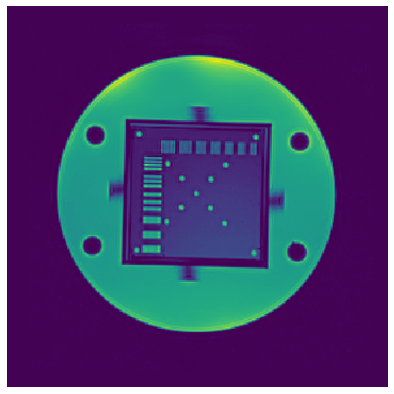

In [6]:
img = imread('resolution.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**2.** La largeur du cube central est de 10 cm. En déduire la largeur d'un pixel en millimètre.

In [7]:
# Les coordonnées des coins supérieurs du carré sont: (160,151) et (356, 157).
def calculTailleP (img, i, j, k, m):
    sectionImg = img[i:j, k:m]
    h, w = sectionImg.shape
    import math
    nbPixel = math.sqrt(h**2 + w**2)
    dimPixel = 100/nbPixel
    return dimPixel

dimPixel = calculTailleP(img, 151, 157, 160, 356)
print("Dimensions d'un pixel en millimètre: ", dimPixel)


Dimensions d&#39;un pixel en millimètre:  0.5099651909640567


**3.** Définisser la méthode ```downsample(img, f)```:

In [8]:
def downsample(img, f):
    """ Sous-échantillone l'image img d'un facteur f
    @param img  L'image à sous-échantilloner.
    @param f    Le facteur de sous-échantillonage (un pixel sur f est conservé).
    @return     L'image sous-échantillonée: sa taille est celle d'img divisée par f.
    """
    img = img.copy()
    imgSE = np.array(img)[::f,::f]
    return imgSE

    #return ...

**4.** Affichez les images sous-échantillonnées avec ```f=2,5,8```. Comment évolue la largeur d'un pixel lors du sous-échantillonage?

Taille d un pixel selon le facteur de sous-échantillonage f
Image originale: 0.509965 | f = 2: 1.019559 | f = 5: 2.563260 | f = 8: 3.996804
On observe que plus le facteur d échantillonage augmente, plus la résolution de l image diminue et plus la taille d un pixel est grande.


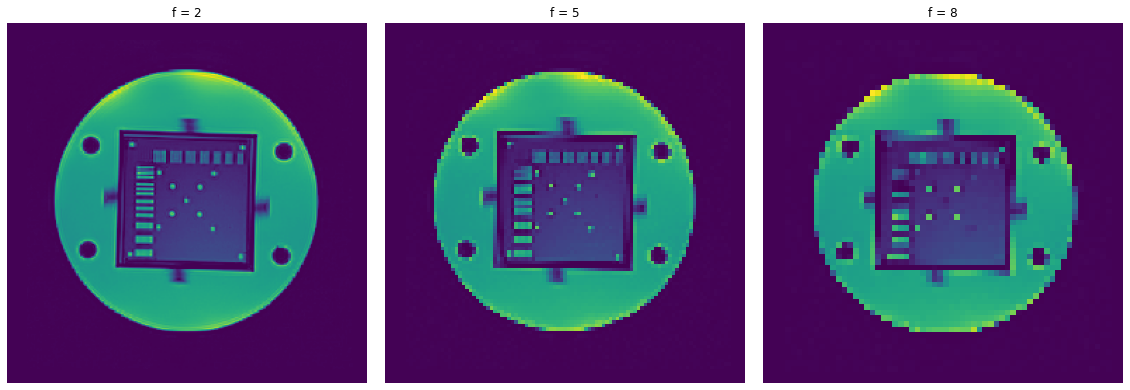

In [9]:
imgSEf2 = downsample(img, 2)
imgSEf5 = downsample(img,5)
imgSEf8 = downsample(img,8)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(imgSEf2)
ax1.axis('off')
ax1.set_title('f = 2')

ax2.imshow(imgSEf5)
ax2.axis('off')
ax2.set_title('f = 5')

ax3.imshow(imgSEf8)
ax3.axis('off')
ax3.set_title('f = 8')

fig.set_size_inches(20,10)
plt.subplots_adjust(wspace=.05)
fig.show()

## Les valeurs des coordonnées des coins supérieurs du carré sont déterminés en utilisant les valeurs de l'image initiale et en divisant par le facteur de sous-échantillonage
dimPixelf2 = calculTailleP(imgSEf2, 75, 79, 80, 178)
dimPixelf5 = calculTailleP(imgSEf5, 30, 31, 32, 71)
dimPixelf8 = calculTailleP(imgSEf8, 19, 20, 20, 45)
print('Taille d un pixel selon le facteur de sous-échantillonage f')
print("Image originale: %f | f = 2: %f | f = 5: %f | f = 8: %f" % (dimPixel, dimPixelf2, dimPixelf5, dimPixelf8))
print('On observe que plus le facteur d échantillonage augmente, plus la résolution de l image diminue et plus la taille d un pixel est grande.')

La largeur de chaque pixel augmente, la résolution diminue.

Sur le premier graphique, on observe d abord une série de 4 pics d intensité. Ces quatre premiers pics sont associés aux mires de 1/8 de cm. On observe ensuite trois séries de trois pics d intensité, associées aux mires de 1/6 cm, 1/4 cm et 1/2 cm. La résolution permet donc d observer les objects de cette taille. Pour le deuxième graphique, ont observe des pics distincts pour les mires de 1 mm. Cependant, les mires de 1/2 mm et plus petites ne sont pas observables, car on ne distingue pas de pics d intensité différents. Ainsi, la taille du plus petit objet observable est de 1mm.


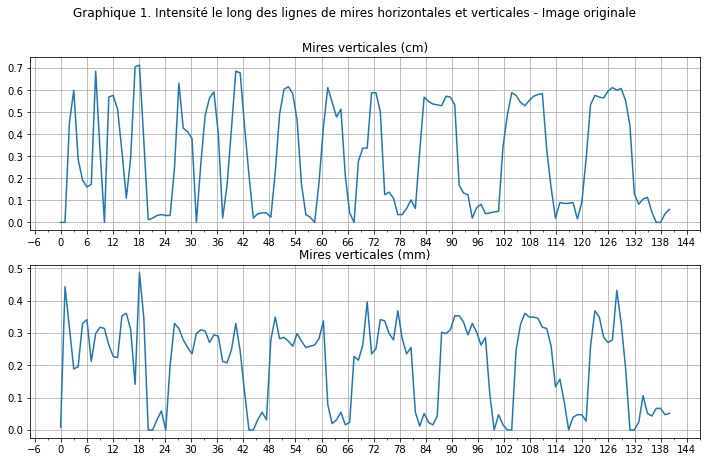

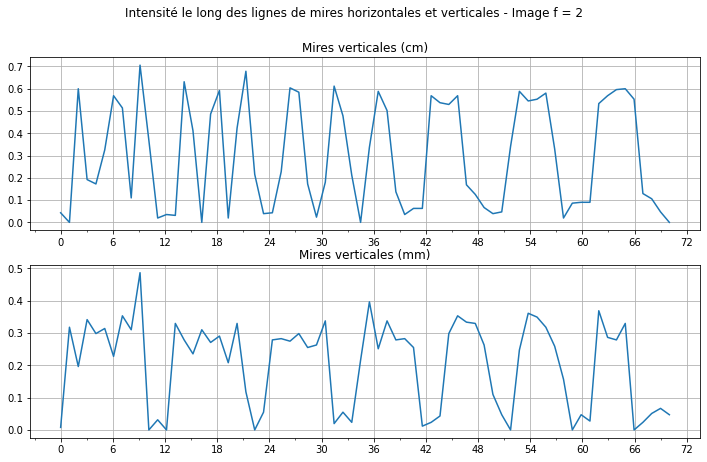

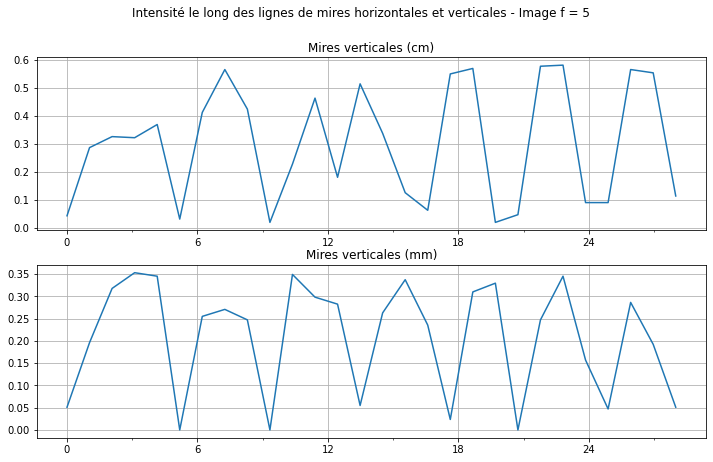

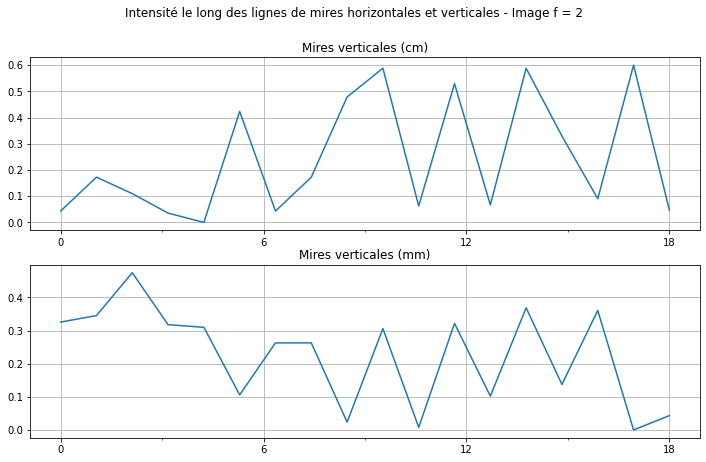

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
img = imread('resolution.png')

def display_mire(img,j,k,m,n,q):
    fig, axs = plt.subplots(2)
    x = np.linspace(0,j, j)
    locMinor = plticker.MultipleLocator(base=3)
    locMajor = plticker.MultipleLocator(base=6)
    
    mireCM = []
    for i in range(j):
        mireCM.append(img[i+k,m])
    axs[0].plot(x, mireCM)
    axs[0].set_title('Mires verticales (cm)')
    axs[0].xaxis.set_major_locator(locMajor)
    axs[0].xaxis.set_minor_locator(locMinor)
    axs[0].grid(which='major', axis = 'both', linestyle ='-')
    
    mireMM = []
    for i in range(j):
        mireMM.append(img[n, i+q])
    axs[1].plot(x, mireMM)
    axs[1].set_title('Mires verticales (mm)')
    axs[1].xaxis.set_major_locator(locMajor)
    axs[1].xaxis.set_minor_locator(locMinor)
    axs[1].grid(which='major', axis = 'both', linestyle ='-')
    
    return fig

fig1 = display_mire(img, 140,201,200,190,206)
fig1.suptitle('Graphique 1. Intensité le long des lignes de mires horizontales et verticales - Image originale')
fig1.show()

print('Sur le premier graphique, on observe d abord une série de 4 pics d intensité. Ces quatre premiers pics sont associés aux mires de 1/8 de cm. On observe ensuite trois séries de trois pics d intensité, associées aux mires de 1/6 cm, 1/4 cm et 1/2 cm. La résolution permet donc d observer les objects de cette taille. Pour le deuxième graphique, ont observe des pics distincts pour les mires de 1 mm. Cependant, les mires de 1/2 mm et plus petites ne sont pas observables, car on ne distingue pas de pics d intensité différents. Ainsi, la taille du plus petit objet observable est de 1mm.')

fig2 = display_mire(imgSEf2, 70,100,100,95,103)
fig2.suptitle('Graphique 2. Intensité le long des lignes de mires horizontales et verticales - Image f = 2')
fig2.show()

fig3 = display_mire(imgSEf5, 28,40,40,38,41)
fig3.suptitle('Graphique 3. Intensité le long des lignes de mires horizontales et verticales - Image f = 5')
fig3.show()

fig4 = display_mire(imgSEf8, 18,25,25,24,26)
fig4.suptitle('Graphique 4. Intensité le long des lignes de mires horizontales et verticales - Image f = 2')
fig4.show()



In [18]:
**6.** Discutez de la relation entre la résolution de l'image (largeur d'un pixel) et la taille du plus petit objet observable. Sachant la résolution, quelle est la taille minimale observable? Est-elle garantie?



Object `garantie` not found.


In [12]:
print('Théoriquement, la taille du plus petit objet observable est celle de la taille du pixel. Ceci est observé à la question 5. La taille d un pixel pour l image originale et de 0.509965 mm, c est pourquoi les mires de 1/2 mm ne sont pas observables. Cette relation est également observée pour des résolutions plus basses (taille de pixels plus grande lors du sous échantillonage). Cette relation n est pas garantie en pratique. Le graphique 2 montre les lignes de mire pour l image sous échantillonée avec f = 2. Comme la taille d un pixel et de 1.019559 mm, la taille des plus petites mires observables devrait être de 1/8 cm. Cependant, on ne distingue pas les 4 pics d intensité associés à ces mires. Les pics 2 et 3 sont confondus, ce qui est peu être dû à une présence de bruit dans cette région de l image. On observe la même tendance aux graphiques 3 et 4; la taille du plus petit observable est supérieure à celle théorique. Bref, la relation de résolution avec la taille du plus petit observable n est pas garantie.')

Théoriquement, la taille du plus petit objet observable est celle de la taille du pixel. Ceci est observé à la question 5. La taille d un pixel pour l image originale et de 0.509965 mm, c est pourquoi les mires de 1/2 mm ne sont pas observables. Cette relation est également observée pour des résolutions plus basses (taille de pixels plus grande lors du sous échantillonage). Cette relation n est pas garantie en pratique. Le graphique 2 montre les lignes de mire pour l image sous échantillonée avec f = 2. Comme la taille d un pixel et de 1.019559 mm, la taille des plus petites mires observables devrait être de 1/8 cm. Cependant, on ne distingue pas les 4 pics d intensité associés à ces mires. Les pics 2 et 3 sont confondus, ce qui est peu être dû à une présence de bruit dans cette région de l image. On observe la même tendance aux graphiques 3 et 4; la taille du plus petit observable est supérieure à celle théorique. Bref, la relation de résolution avec la taille du plus petit observable

Les plus petites lignes distinguables ont une taille de 1 mm.

In [ ]:
## Mesure de l'épaisseur de coupe


**7.** Affichez les profils d'intensités des 4 rampes et mesurer graphiquement la largeur des gaussiennes à mi-hauteur 

(Affichez les grilles sur les graphiques et augmenter la fréquence des ticks et la taille de l'image devraient faciliter la mesure).

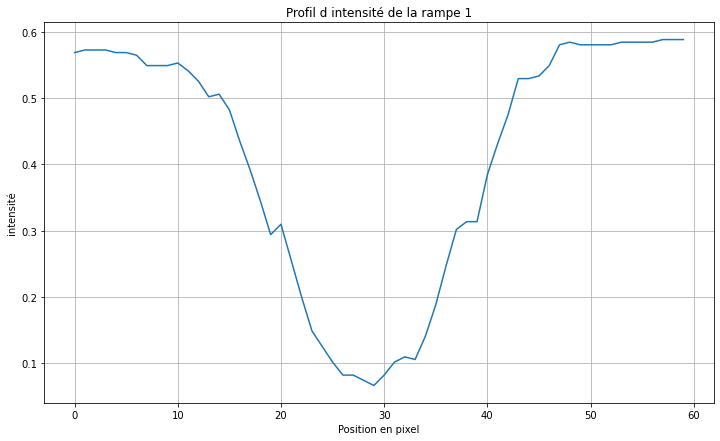

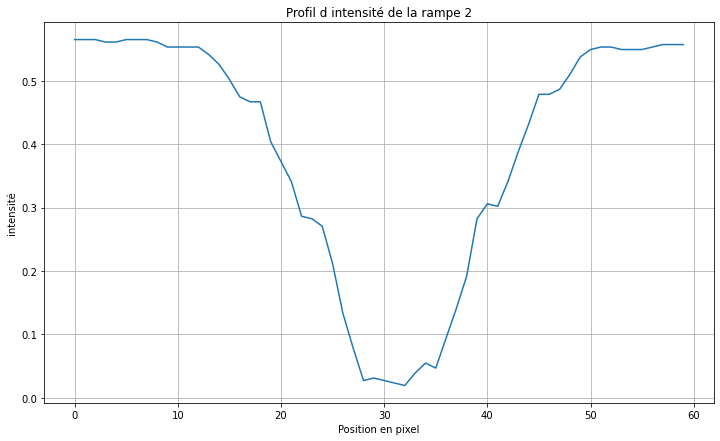

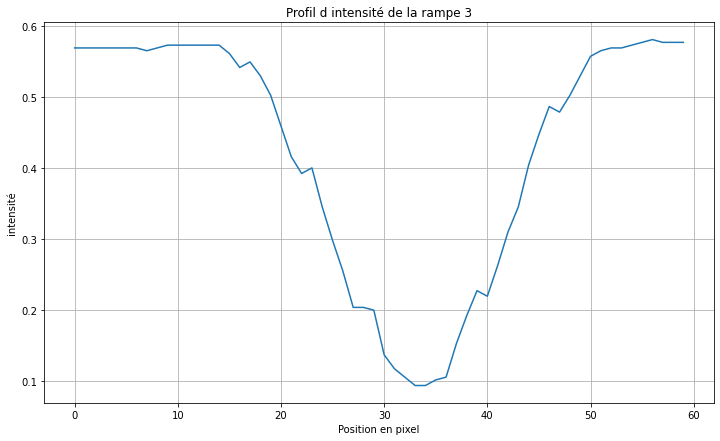

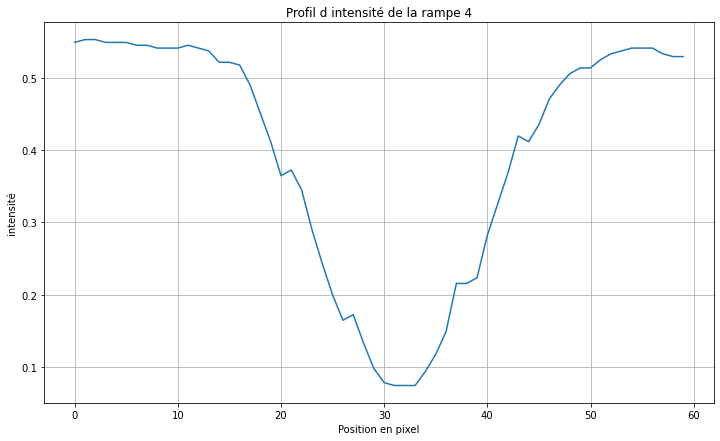

Epaisseur de la coupe en mm
Coupe rampe 1: 2.797269 | Coupe rampe 2: 2.415823 | Coupe rampe 3: 2.415823 | Coupe rampe 4: 2.415823


In [21]:
# Pour les coordonées des profils on peut prendre:
# y=140; x=230:290
# y=230:290; x=365
# y=360; x=210:270
# y=215:275; x=147


img = imread('resolution.png')
def display_profilsIntensité_const_y(m,n,k, img):
    intensite = np.zeros(n-m)
    x = np.arange(0,n-m, 1)
    for i in range(n-m):
        intensite[i] = img[k, m+i]
    plt.figure()
    plt.plot(x, intensite)
    plt.ylabel('intensité')
    plt.xlabel('Position en pixel')
    plt.grid()
    return plt, intensite, x

def display_profilsIntensité_const_x(m,n,k, img):
    intensite = np.zeros(n-m)
    x = np.arange(0,n-m, 1)
    for i in range(n-m):
        intensite[i] = img[m+i, k]
    plt.figure()
    plt.plot(x, intensite)
    plt.ylabel('intensité')
    plt.xlabel('Position en pixel')
    plt.grid()
    return plt, intensite, x

fig1, intensite1, x1 = display_profilsIntensité_const_y(230, 290, 140, img)
fig1.title('Profil d intensité de la rampe 1')
fig1.show()

fig2, intensite2, x2 = display_profilsIntensité_const_x(230, 290, 365, img)
fig2.title('Profil d intensité de la rampe 2')
fig2.show()

fig3, intensite3, x3 = display_profilsIntensité_const_y(210, 270, 360, img)
fig3.title('Profil d intensité de la rampe 3')
fig3.show()

fig4, intensite4, x4 = display_profilsIntensité_const_x(215, 275, 147, img)
fig4.title('Profil d intensité de la rampe 4')
fig4.show()

##Les valeurs à mi hauteur sont approximatives puisque les gaussiennes ne sont pas parfaites.

h1 = min(intensite1) + (max(intensite1) - min(intensite1))/2
h2 = min(intensite2) + (max(intensite2) - min(intensite2))/2
h3 = min(intensite3) + (max(intensite3) - min(intensite3))/2
h4 = min(intensite4) + (max(intensite4) - min(intensite4))/2

def trouverLargeur(intensite, x, h):
    x_cible = np.zeros(2)
    k=0
    for i in range(len(x)-1):
        if intensite[i-1] < h and intensite[i+1] > h or intensite[i-1] > h and intensite[i+1] < h:
            x_cible[k]=x[i]
            if k == 0:
                k=1
    FWHM=(x_cible[1]-x_cible[0])*dimPixel
    return FWHM

FWHM1=trouverLargeur(intensite1,x1,h1)
FWHM2=trouverLargeur(intensite2,x2,h2)
FWHM3=trouverLargeur(intensite3,x3,h3)
FWHM4=trouverLargeur(intensite4,x4,h4)

import math
e1 = math.tan(math.radians(14)) * FWHM1
e2 = math.tan(math.radians(14)) * FWHM2
e3 = math.tan(math.radians(14)) * FWHM3
e4 = math.tan(math.radians(14)) * FWHM4

print('Epaisseur de la coupe en mm')
print("Coupe rampe 1: %f | Coupe rampe 2: %f | Coupe rampe 3: %f | Coupe rampe 4: %f" % (e1, e2, e3, e4))


**8.**L'épaisseur de la coupe est donnée par $e=\tan((14^\circ) \times FWHM$ où $FWHM$ est la largeur à mi-hauteur en mm.
Sachant que les paramètres de l'IRM indiquent une épaisseur de coupe théorique de $2\pm0.2$mm, passerait-il le controle qualité?

In [33]:
print('Non, puisque toutes les épaisseurs obtenues sont supérieures à 2.2 mm.')

Non, puisque toutes les épaisseurs obtenues sont supérieures à 2.2 mm.


# Exercice II (3 points): Analyse du Contraste et du Bruit
## Mesure du contraste

**1.** Chargez  et affichez l'image ```contraste.png```.

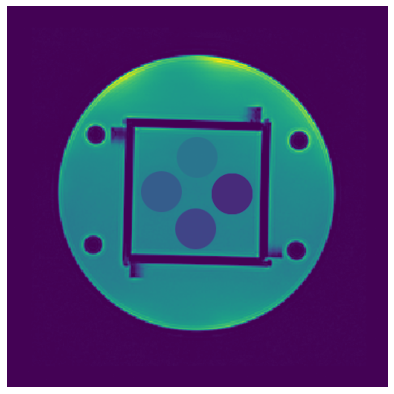

In [84]:
img = imread('contraste.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**2.** Chargez  et affichez les 4 matrices ```vial1.npy```, ```vial2.npy```, ```vial3.npy```, ```vial4.npy```.

Text(0.5, 1.0, &#39;vial4&#39;)

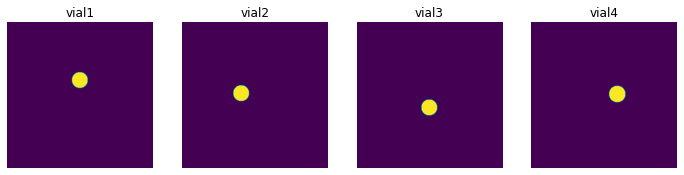

In [85]:
# Utilisez np.load('fichier.npy') pour charger une matrice numpy.
vial1 = np.load('vial1.npy')
vial2 = np.load('vial2.npy')
vial3 = np.load('vial3.npy')
vial4 = np.load('vial4.npy')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.imshow(vial1)
ax1.axis('off')
ax1.set_title('vial1')

ax2.imshow(vial2)
ax2.axis('off')
ax2.set_title('vial2')

ax3.imshow(vial3)
ax3.axis('off')
ax3.set_title('vial3')

ax4.imshow(vial4)
ax4.axis('off')
ax4.set_title('vial4')

**3.** Définissez et affichez le masque du fond du fantôme qui est constitué du carré central privé des 4 ampoules.
Pour le carré central vous pourrez prendre la région: 

$174\leq y<330$ et $178\leq x<331$

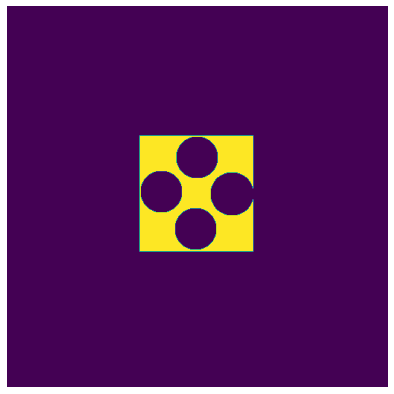

In [86]:
##Créer une matrice de 0 de la même taille que l’image
x, y = img.shape
matrice= np.zeros((x,y))

##Mettre à 1 tous les pixels à l’intérieur du carré central 
matrice[174:330, 178:331] = 1

##Soustraction des masques de chaque ampoule
matrice -= (vial1+vial2+vial3+vial4)

plt.imshow(matrice)
plt.axis('off')
plt.show()


**4.** Calculez l'intensité moyenne sur ces 4 régions et sur le fond du fantôme.

In [87]:
# Pour extraire la valeur des pixels d'une image appartenant à un masque on utilise la syntaxe:
# image[masque]  (où image et masque on la même taille et où masque est une matrice booléenne)

masque1 = np.mean(img[vial1])
masque2 = np.mean(img[vial2])
masque3 = np.mean(img[vial3])
masque4= np.mean(img[vial4])
fond = img[0:60, 0:60]
## On affiche la région du fond choisie pour s'assurer qu'il s'agit bien du fond.
##plt.imshow(fond)
fondMean = np.mean(fond)
contraste1 = (masque1 - fondMean)/(fondMean)
contraste2 = (masque2 - fondMean)/(fondMean)
contraste3 = (masque3 - fondMean)/(fondMean)
contraste4 = (masque4 - fondMean)/(fondMean)

print('Moyenne des intensités:')
print("Ampoule 1: %f | Ampoule 2: %f | Ampoule 3: %f | Ampoule 4: %f | Fond: %f" % (masque1, masque2, masque3, masque4, fondMean))
print('Contrastes locaux pour les quatre ampoules')
print("Ampoule 1: %f | Ampoule 2: %f | Ampoule 3: %f | Ampoule 4: %f" % (contraste1, contraste2, contraste3, contraste4))

Moyenne des intensités:
Ampoule 1: 0.391376 | Ampoule 2: 0.299110 | Ampoule 3: 0.213420 | Ampoule 4: 0.146829 | Fond: 0.005852
Contrastes locaux pour les quatre ampoules
Ampoule 1: 65.880775 | Ampoule 2: 50.113766 | Ampoule 3: 35.470478 | Ampoule 4: 24.090986


## Mesure du Rapport Signal/Bruit

**6.** Chargez et affichez l'image ```bruit.png```. (Conservez les axes et afficher une grille).

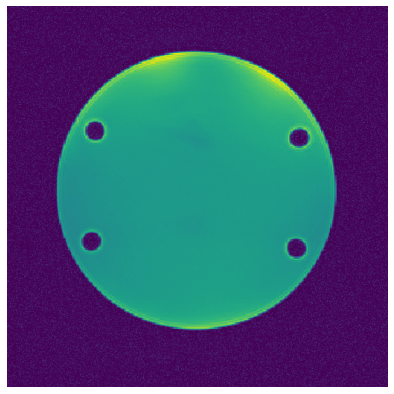

In [38]:
img = imread('bruit.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**7.** En vous aidant de l'image affichée à la question précédente, sélectionner grossièrement la région d'intéret et les 4 zones de fond. 

Puis calculez le rapport signal bruit en décibel.

In [90]:

sectionMilieu = img[250:350, 200:300]
## On affiche la section pour s'assurer d'être au centre.
##plt.imshow(sectionMilieu)

sectionCoin1 = img[0:100, 0:100]
##plt.imshow(sectionCoin1)

sectionCoin2 = img[400:500,0:100]
##plt.imshow(sectionCoin2)

sectionCoin3 = img[0:100, 400:500]
sectionCoin4 = img[400:500, 400:500]

def SNR(sectionCoin, sectionMilieu):
    surface = 100*100
    stdCoin = np.std(sectionCoin)
    ICible = np.mean(sectionMilieu)
    ICoin = np.mean(sectionCoin)
    SNRdiff = surface*(ICible-ICoin)/stdCoin
    SNRa = 20*math.log(SNRdiff,10)
    return SNRa

import statistics
SNR1 = SNR(sectionCoin1, sectionMilieu)
SNR2 = SNR(sectionCoin2, sectionMilieu)
SNR3 = SNR(sectionCoin3, sectionMilieu)
SNR4 = SNR(sectionCoin4, sectionMilieu)
SNR = [SNR1, SNR2, SNR3, SNR4]
SNRmoyen = statistics.mean(SNR)
print('SNR:')
print(SNRmoyen)


SNR:
119.3349853865643


**8.** Que représente le rapport signal/bruit? Est-il préférable d'avoir un SNR faible ou fort?



In [92]:
print('Le rapport signal/bruit représente l amplitude du signal sur l amplitude du bruit. Il est préférable d avoir une valeur de SNR élevée, car cela signifie que le signal est plus fort que le bruit et que la qualité de l image est meilleure.')

Le rapport signal/bruit représente l amplitude du signal sur l amplitude du bruit. Il est préférable d avoir une valeur de SNR élevée, car cela signifie que le signal est plus fort que le bruit et que la qualité de l image est meilleure.


# Exercice 3 (4 points)
## Comparaison d'Imageries Intra-vasculaires

**1.** Chargez et afficez les deux images ```echo.png``` et ```oct.png```. Convertissez l'image OCT en niveau de gris en sélectionnant son canal rouge.


Affichez les portions des images concernées par les masques ```echo_lum.npy```, ```echo_paroi.npy```, ```oct_lum.npy``` et ```oct_paroi.npy``` (en multipliant l'image par son masque).

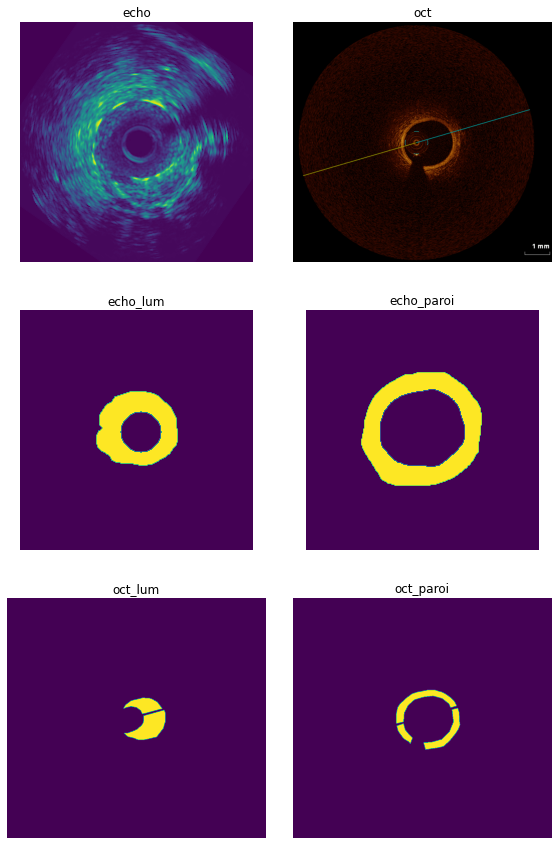

In [58]:
imgEcho = imread('echo.png')
imgOct = imread('oct.png')
echoLum = np.load('echo_lum.npy')
echoParoi = np.load('echo_paroi.npy')
octLum = np.load('oct_lum.npy')
octParoi = np.load('oct_paroi.npy')

fig, ax = plt.subplots(3,2)

ax[0,0].imshow(imgEcho)
ax[0,0].axis('off')
ax[0,0].set_title('echo')

ax[0,1].imshow(imgOct)
ax[0,1].axis('off')
ax[0,1].set_title('oct')

ax[1,0].imshow(echoLum)
ax[1,0].axis('off')
ax[1,0].set_title('echo_lum')

ax[1,1].imshow(echoParoi)
ax[1,1].axis('off')
ax[1,1].set_title('echo_paroi')

ax[2,0].imshow(octLum)
ax[2,0].axis('off')
ax[2,0].set_title('oct_lum')

ax[2,1].imshow(octParoi)
ax[2,1].axis('off')
ax[2,1].set_title('oct_paroi')

fig.set_size_inches(10,15)
plt.subplots_adjust(wspace=.05)
fig.show()

**2.** Calculez le contraste entre la paroi et la lumière du vaisseau ainsi que le SNR des deux modalités.

In [88]:
# Si les aires de région d'intéret et de fond sont différentes, on prend l'aire du fond dans la formule du SNR.
regionEcho = imgEcho[echoParoi]
fondEcho = imgEcho[echoLum]
regionOct = imgOct[octParoi]
fondOct = imgOct[octLum]

meanRegionEcho = np.mean(imgEcho[echoParoi])
meanFondEcho = np.mean(imgEcho[echoLum])
meanRegionOct = np.mean(imgOct[octParoi])
meanFondOct = np.mean(imgOct[octLum])

SEcho = fondEcho.shape[0]
SOct = fondOct.shape[0]
stdEcho = np.std(fondEcho)
stdOct = np.std(fondOct)

SNREcho = (SEcho*(meanRegionEcho-meanFondEcho))/stdEcho
SNROct = (SOct*(meanRegionOct-meanFondOct))/stdOct

contrasteEcho = (meanRegionEcho-meanFondEcho)/meanFondEcho
contrasteOct = (meanRegionOct-meanFondOct)/meanFondOct

print('Rapport signal sur bruit (SNR):')
print("Echo: %f | Oct: %f" % (SNREcho, SNROct))
print('Contrastes')
print("Echo: %f | Oct: %f" % (contrasteEcho, contrasteOct))


Rapport signal sur bruit (SNR):
Echo: 9738.274096 | Oct: 2856.290231
Contrastes
Echo: 1.622523 | Oct: 0.462742


**3.** Discutez du choix entre l'OCT et de l'echocardiographie pour une simple mesure du diamètre de la lumière du vaisseau.


In [89]:
print('Pour effectuer une simple mesure du diamètre de la lumière du vaisseau, le meilleur choix est l échographie. En effet, l image de l échographie possède un rapport du signal sur bruit plus élevé que l OCT. Il est préférable d avoir un grand rapport signal sur bruit pour avoir une meilleure qualité d image. De plus, l image d échographie possède un contraste plus important que celle d OCT, ce qui permet de mieux démarquer et définir les régions d intérêt.')

Pour effectuer une simple mesure du diamètre de la lumière du vaisseau, le meilleur choix est l échographie. En effet, l image de l échographie possède un rapport du signal sur bruit plus élevé que l OCT. Il est préférable d avoir un grand rapport signal sur bruit pour avoir une meilleure qualité d image. De plus, l image d échographie possède un contraste plus important que celle d OCT, ce qui permet de mieux démarquer et définir les régions d intérêt.
